In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
df = pd.read_csv('../data/processed_flood_analysis_data.csv', index_col='dateOfLoss',  parse_dates=['dateOfLoss'])
print("New start date:", df['Date'].min())
print("New end date:", df['Date'].max())
df['rolling_avg_12'] = df['claimsPerCapita'].rolling(window=12).mean()

New start date: 1978-01-01
New end date: 2025-01-01


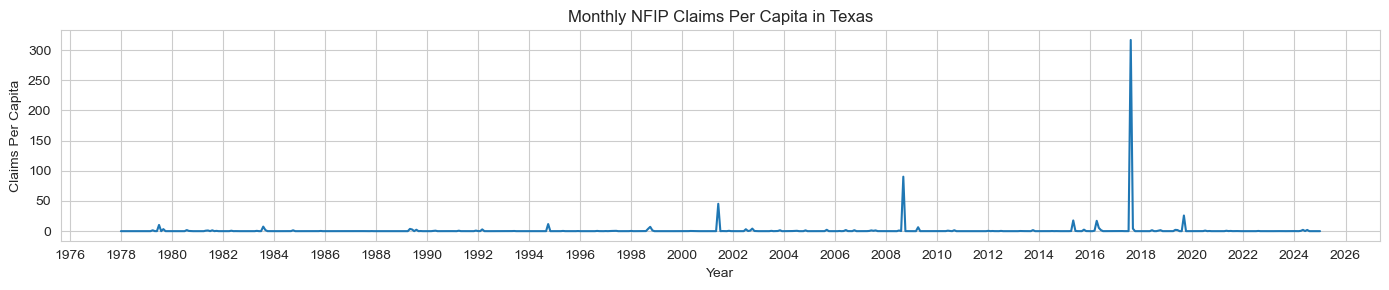

In [2]:
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='claimsPerCapita')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Monthly NFIP Claims Per Capita in Texas')
plt.xlabel('Year')
plt.ylabel('Claims Per Capita')
plt.tight_layout()
plt.show()

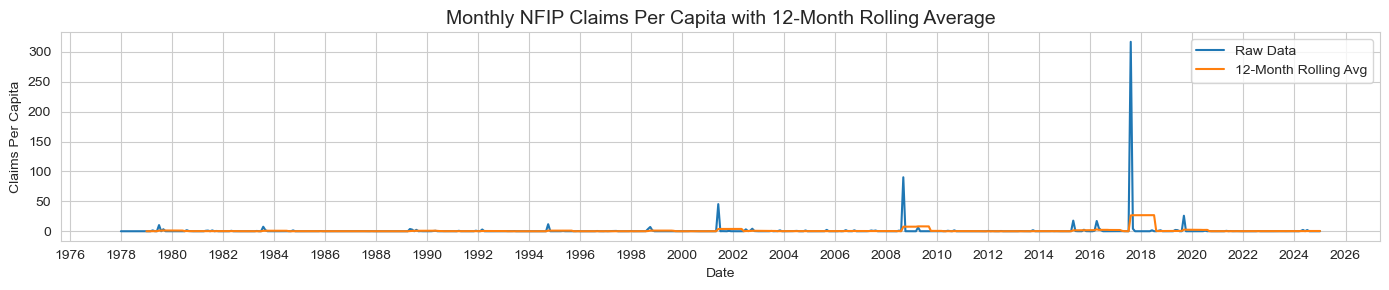

In [3]:
import matplotlib.dates as mdates
import seaborn as sns

plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='claimsPerCapita', label='Raw Data')
sns.lineplot(data=df, x=df.index, y='rolling_avg_12', label='12-Month Rolling Avg')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Monthly NFIP Claims Per Capita with 12-Month Rolling Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Claims Per Capita')
plt.tight_layout()
plt.show()

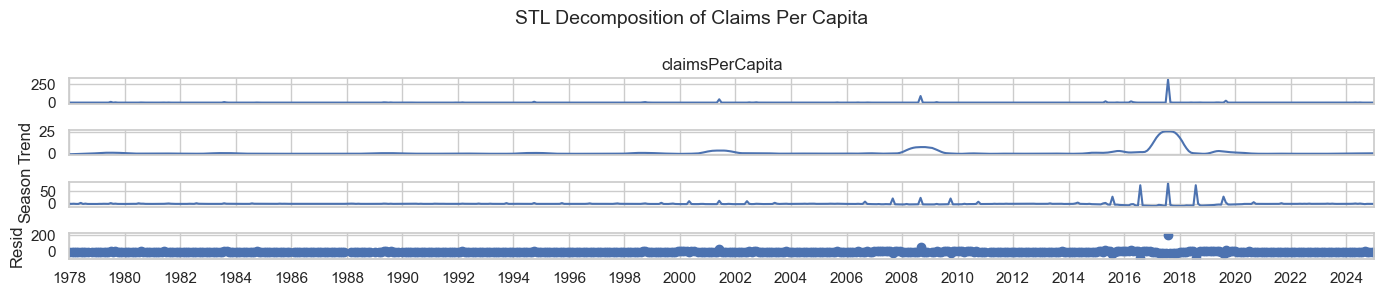

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style="whitegrid")
stl = STL(df['claimsPerCapita'], period=12)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(14, 3)
fig.suptitle('STL Decomposition of Claims Per Capita', fontsize=14)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

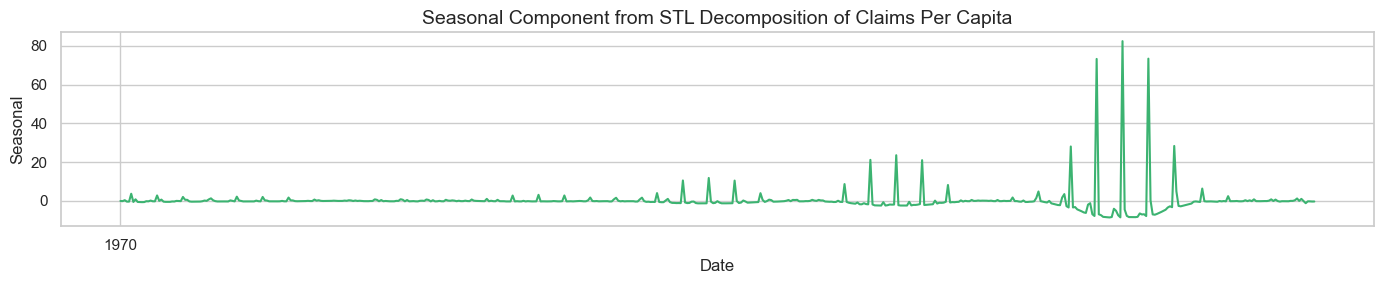

In [5]:
stl = STL(df['claimsPerCapita'], period=12)
res = stl.fit()
plt.figure(figsize=(14, 3))
plt.plot(df['Date'], res.seasonal, label='Seasonal Component', color='mediumseagreen')
plt.title('Seasonal Component from STL Decomposition of Claims Per Capita', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True) 
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

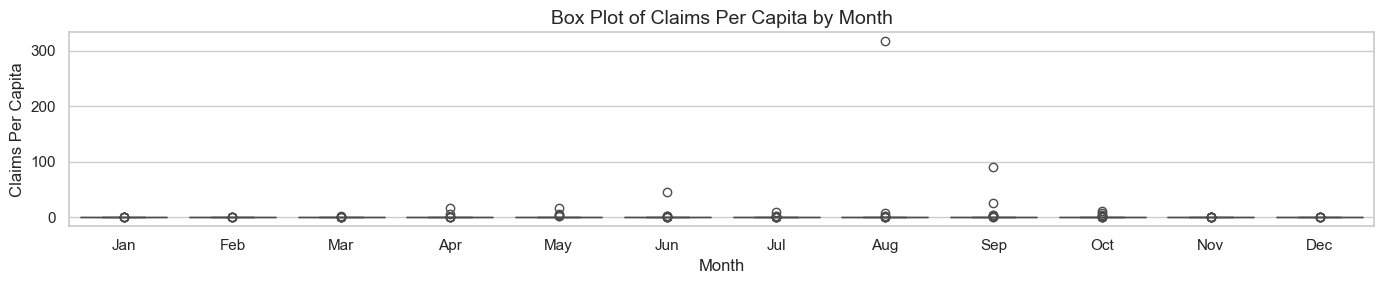

In [6]:
df['Date'] = pd.to_datetime(df['Date'])    
df['month'] = df['Date'].dt.month       
plt.figure(figsize=(14, 3))
sns.boxplot(x='month', y='claimsPerCapita', data=df)
plt.title('Box Plot of Claims Per Capita by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Claims Per Capita')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

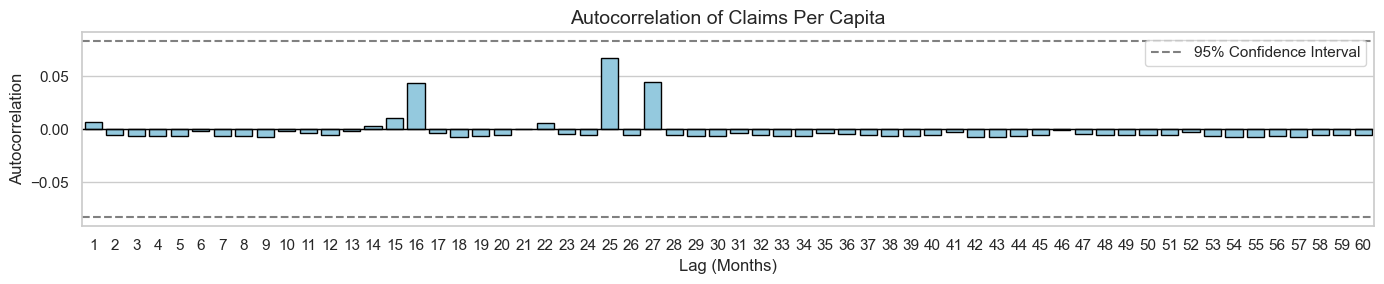

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

max_lag = 60
acf_values = [df['claimsPerCapita'].autocorr(lag=i) for i in range(1, max_lag + 1)]
acf_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'Autocorrelation': acf_values
})
plt.figure(figsize=(14, 3))
sns.barplot(x='Lag', y='Autocorrelation', data=acf_df, color='skyblue', edgecolor='black')
n = len(df['claimsPerCapita'].dropna())
conf_bound = 1.96 / np.sqrt(n)
plt.axhline(y=conf_bound, color='gray', linestyle='--', label='95% Confidence Interval')
plt.axhline(y=-conf_bound, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Autocorrelation of Claims Per Capita', fontsize=14)
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.tight_layout()
plt.show()

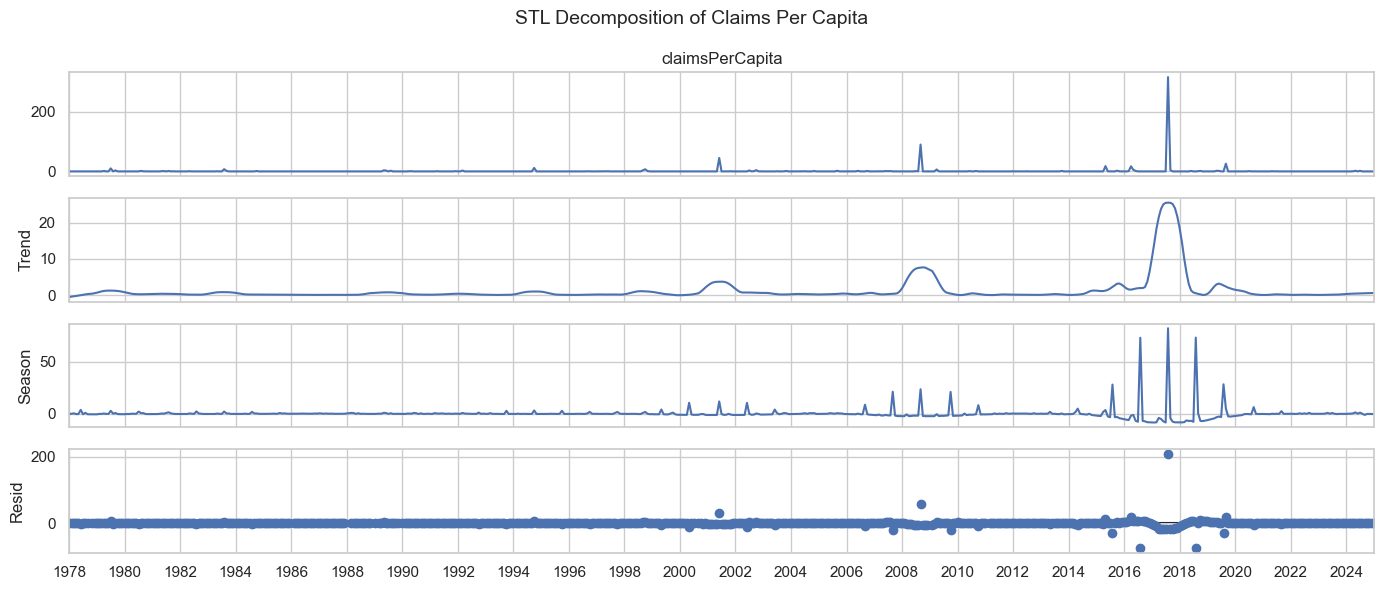

In [8]:
from statsmodels.tsa.seasonal import STL
df_decomp = df.set_index('Date')
stl = STL(df_decomp['claimsPerCapita'], period=12)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(14, 6)
fig.suptitle('STL Decomposition of Claims Per Capita', fontsize=14)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df['t'] = np.arange(1, len(df) + 1)
X = sm.add_constant(df['t'])
y = df['claimsPerCapita']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        claimsPerCapita   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.973
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.161
Time:                        11:58:58   Log-Likelihood:                -2258.5
No. Observations:                 555   AIC:                             4521.
Df Residuals:                     553   BIC:                             4530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2594      1.206     -0.215      0.8

In [10]:
sum = df[['totalAmountPaid', 'ONI_Anomaly', "Resident Population", 'claimsPerCapita']]
summary_statistics = sum.describe()
summary_statistics

,totalAmountPaid,ONI_Anomaly,Resident Population,claimsPerCapita
count,5.550000e+02,555.000000,5.550000e+02,5.550000e+02
mean,3.094975e+07,0.029730,2.188452e+07,1.208188e+00
std,3.947424e+08,0.846259,5.264232e+06,1.419851e+01
min,1.000000e+00,-1.800000,1.362270e+07,5.734779e-08
25%,6.442452e+04,-0.540000,1.703483e+07,3.272547e-03
50%,3.663076e+05,-0.050000,2.160322e+07,1.944756e-02
75%,1.958031e+06,0.490000,2.652887e+07,8.521265e-02
max,8.927813e+09,2.640000,3.129083e+07,3.168267e+02


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print("Conclusion: Data is stationary (reject H0)")
    else:
        print("Conclusion: Data is non-stationary (fail to reject H0)")

def kpss_test(series):
    result = kpss(series)
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print("Conclusion: Data is non-stationary (reject H0)")
    else:
        print("Conclusion: Data is stationary (fail to reject H0)")

adf_test(df['ONI_Anomaly'])
kpss_test(df['ONI_Anomaly'])

ADF Statistic: -6.442583138832659
p-value: 1.594557705357372e-08
Critical Values:
	1%: -3.442517884424376
	5%: -2.8669071815780116
	10%: -2.5696285219478736
Conclusion: Data is stationary (reject H0)
KPSS Statistic: 0.08571214101820133
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Conclusion: Data is stationary (fail to reject H0)


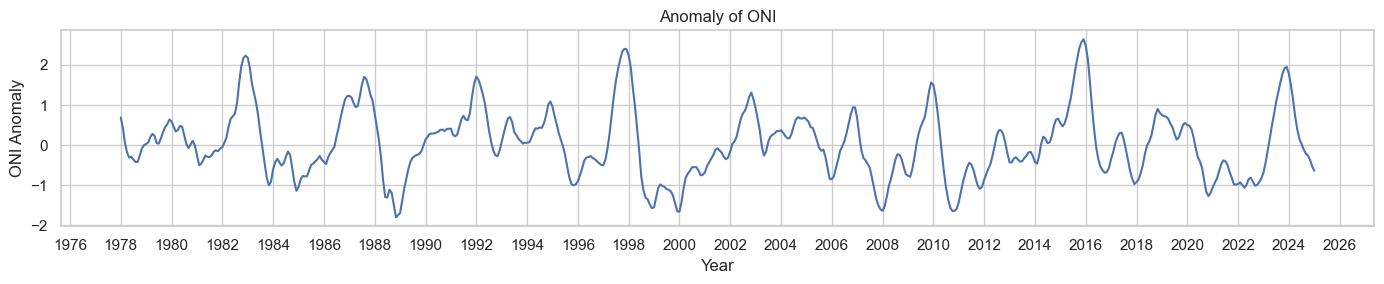

In [13]:
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='ONI_Anomaly')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Anomaly of ONI')
plt.xlabel('Year')
plt.ylabel('ONI Anomaly')
plt.tight_layout()
plt.show()

In [14]:
print("New start date:", df['Date'].min())
print("New end date:", df['Date'].max())
df[f'ONI_Anomaly_lag2'] = df['ONI_Anomaly'].shift()*2
df[f'ONI_Anomaly_lag3'] = df['ONI_Anomaly'].shift()*3
df[f'ONI_Anomaly_lag4'] = df['ONI_Anomaly'].shift()*4
df[f'ONI_Anomaly_lag14'] = df['ONI_Anomaly'].shift()*14
df = df.dropna().reset_index(drop=True)
df['diff_claimsPerCapita'] = df['claimsPerCapita'].diff()
df['log_diff_claimsPerCapita'] = np.log(df['claimsPerCapita']).diff()
df['log_claimsPerCapita'] = np.log(df['claimsPerCapita'])
df = df.dropna().reset_index(drop=True)
print(df.index.min(), "to", df.index.max())
print("New start date:", df['Date'].min())
print("New end date:", df['Date'].max())

New start date: 1978-01-01 00:00:00
New end date: 2025-01-01 00:00:00
0 to 542
New start date: 1979-02-01 00:00:00
New end date: 2025-01-01 00:00:00


In [15]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['log_diff_claimsPerCapita', 'ONI_Anomaly']]
grangercausalitytests(data, maxlag=30, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0226  , p=0.8807  , df_denom=539, df_num=1
ssr based chi2 test:   chi2=0.0227  , p=0.8803  , df=1
likelihood ratio test: chi2=0.0227  , p=0.8803  , df=1
parameter F test:         F=0.0226  , p=0.8807  , df_denom=539, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6684  , p=0.5129  , df_denom=536, df_num=2
ssr based chi2 test:   chi2=1.3493  , p=0.5093  , df=2
likelihood ratio test: chi2=1.3476  , p=0.5098  , df=2
parameter F test:         F=0.6684  , p=0.5129  , df_denom=536, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3354  , p=0.2620  , df_denom=533, df_num=3
ssr based chi2 test:   chi2=4.0588  , p=0.2552  , df=3
likelihood ratio test: chi2=4.0436  , p=0.2568  , df=3
parameter F test:         F=1.3354  , p=0.2620  , df_denom=533, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8786  , p=0.4765  

{1: ({'ssr_ftest': (0.022553551328609957, 0.8806800486274153, 539.0, 1),
   'ssr_chi2test': (0.022679081298899065, 0.8802946105483697, 1),
   'lrtest': (0.022678606827412295, 0.8802958533021095, 1),
   'params_ftest': (0.02255355132825972, 0.8806800486283581, 539.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6684164350755929, 0.5129462204787444, 536.0, 2),
   'ssr_chi2test': (1.3493033260294618, 0.5093338095138987, 2),
   'lrtest': (1.3476234758236387, 0.5097617914775074, 2),
   'params_ftest': (0.668416435075694, 0.5129462204786983, 536.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3353903361963007, 0.26201221423311916, 533.0, 3),
   'ssr_chi2test': (4.058784886750482, 0.2551859899754051, 3),
   'lrtest': (4.043607433073248, 0.25679365296359186, 3),
   'params_ftest': (1.3353903361963022, 0.26201221423311916, 533.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

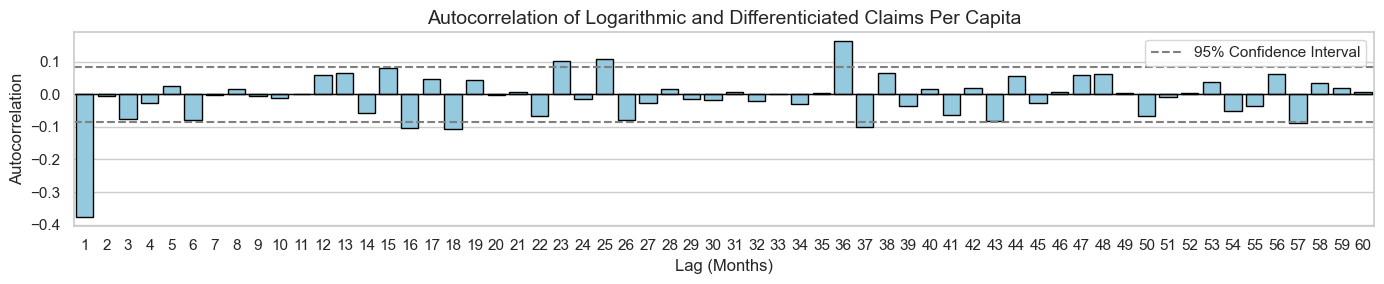

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

max_lag = 60
acf_values = [df['log_diff_claimsPerCapita'].autocorr(lag=i) for i in range(1, max_lag + 1)]
acf_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'Autocorrelation': acf_values
})

plt.figure(figsize=(14, 3))
sns.barplot(x='Lag', y='Autocorrelation', data=acf_df, color='skyblue', edgecolor='black')
n = len(df['claimsPerCapita'].dropna())
conf_bound = 1.96 / np.sqrt(n)
plt.axhline(y=conf_bound, color='gray', linestyle='--', label='95% Confidence Interval')
plt.axhline(y=-conf_bound, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Autocorrelation of Logarithmic and Differenticiated Claims Per Capita', fontsize=14)
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.tight_layout()
plt.show()

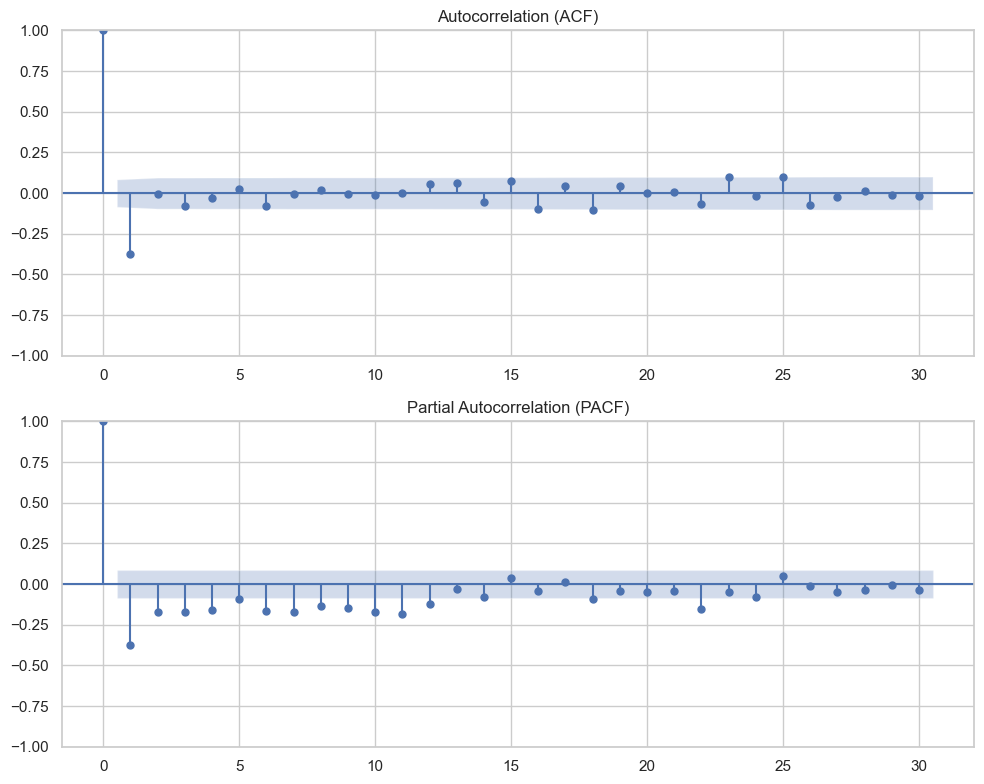

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
difft = df['log_diff_claimsPerCapita']
plot_acf(difft, ax=axes[0], lags=30)
axes[0].set_title('Autocorrelation (ACF)')
plot_pacf(df['log_diff_claimsPerCapita'], ax=axes[1], lags=30, method='ywm')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()

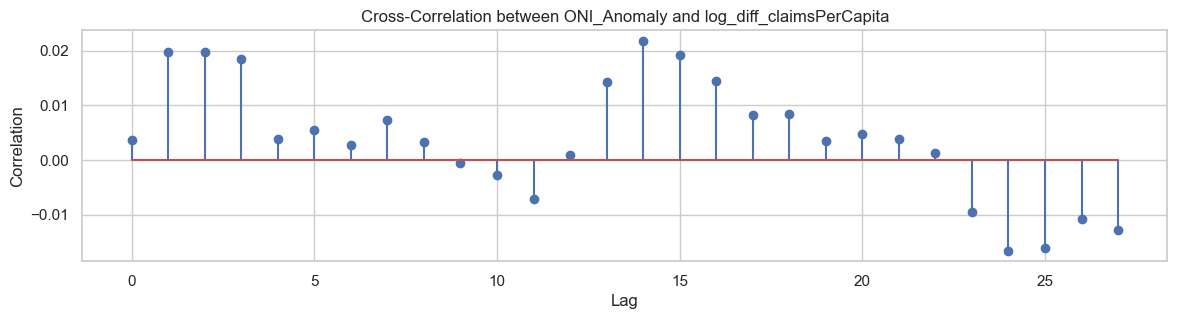

In [18]:
from statsmodels.tsa.stattools import ccf

x = df['ONI_Anomaly'] 
y = df['log_diff_claimsPerCapita']  
plt.figure(figsize=(14, 3))
cross_corr = ccf(x, y)[:28] 
plt.stem(range(len(cross_corr)), cross_corr)
plt.title("Cross-Correlation between ONI_Anomaly and log_diff_claimsPerCapita")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

In [19]:
sum = df[['totalAmountPaid', "Resident Population", 'claimsPerCapita', 'ONI_Anomaly']]
summary_statistics = sum.describe()
summary_statistics

,totalAmountPaid,Resident Population,claimsPerCapita,ONI_Anomaly
count,5.430000e+02,5.430000e+02,5.430000e+02,543.000000
mean,3.162634e+07,2.206389e+07,1.234355e+00,0.031971
std,3.990617e+08,5.180223e+06,1.435372e+01,0.854040
min,1.000000e+00,1.395122e+07,5.734779e-08,-1.800000
25%,6.605596e+04,1.732472e+07,3.378375e-03,-0.550000
50%,3.902768e+05,2.181791e+07,1.957121e-02,-0.040000
75%,2.075454e+06,2.662887e+07,8.691898e-02,0.500000
max,8.927813e+09,3.129083e+07,3.168267e+02,2.640000


In [32]:
sum = df[['log_diff_claimsPerCapita', 'ONI_Anomaly', 'ONI_Anomaly_lag2', 'ONI_Anomaly_lag3', 'ONI_Anomaly_lag14']]
summary_statistics = sum.describe()
summary_statistics

,log_diff_claimsPerCapita,ONI_Anomaly,ONI_Anomaly_lag2,ONI_Anomaly_lag3,ONI_Anomaly_lag14
count,543.000000,543.000000,543.000000,543.000000,543.000000
mean,-0.003930,0.031971,0.066409,0.099613,0.464862
std,3.254862,0.854040,1.707102,2.560653,11.949715
min,-11.558745,-1.800000,-3.600000,-5.400000,-25.200000
25%,-2.065546,-0.550000,-1.100000,-1.650000,-7.700000
50%,-0.091148,-0.040000,-0.080000,-0.120000,-0.560000
75%,1.848480,0.500000,1.000000,1.500000,7.000000
max,16.390820,2.640000,5.280000,7.920000,36.960000


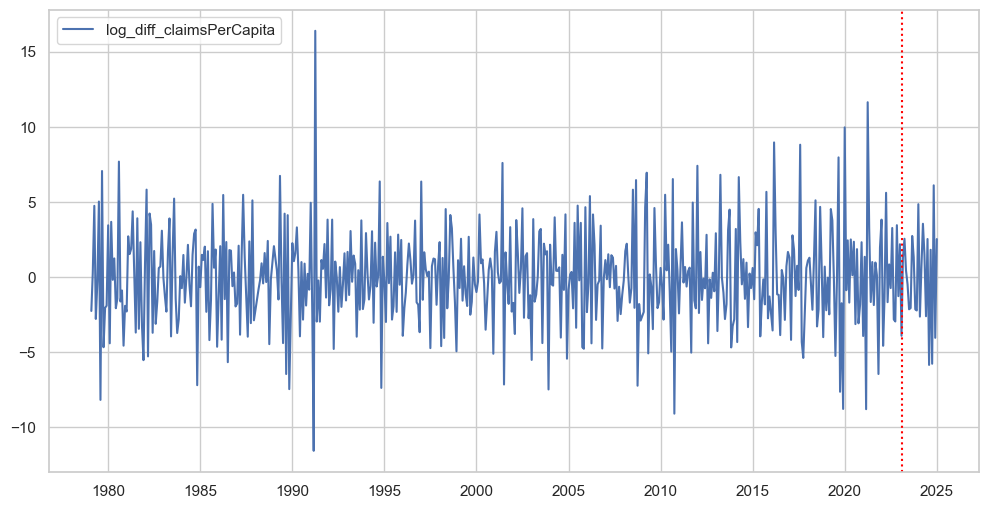

In [21]:
MAX_TRAINING_DATE = df.tail(24).iloc[0]['Date']
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['log_diff_claimsPerCapita'], label='log_diff_claimsPerCapita')
plt.axvline(MAX_TRAINING_DATE, color='red', linestyle='dotted')
plt.legend()
plt.show()
df_train = df.loc[df['Date'] < MAX_TRAINING_DATE, :]
df_test = df.loc[df['Date'] >= MAX_TRAINING_DATE, :]

In [22]:
from tqdm import tqdm
from joblib import Parallel, delayed
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from copy import deepcopy
import numpy as np
import psutil

def randomParameterStepper(current_parameters):
    modified_parameters = deepcopy(current_parameters)
    parameter_to_change = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'])
    if parameter_to_change in ['p', 'q', 'P', 'Q']:
        lower_bound, upper_bound = 0, 5
    elif parameter_to_change in ['d', 'D']:
        lower_bound, upper_bound = 0, 1
    else:
        lower_bound, upper_bound = 0, 1

    modified_parameters[parameter_to_change] = np.clip(
        modified_parameters[parameter_to_change] + np.random.choice([-1, 1]),
        lower_bound, upper_bound
    )
    return modified_parameters

def evaluate_sarimax_model(model_parameters, training_data, testing_data, exo):
    try:
        cpu_before = psutil.cpu_percent(percpu=True)
        mem_before = psutil.virtual_memory().used / 1024**2
        model = SARIMAX(
            endog=training_data['log_diff_claimsPerCapita'],
            exog=training_data[[exo]],
            order=(model_parameters['p'], model_parameters['d'], model_parameters['q']),
            seasonal_order=(model_parameters['P'], model_parameters['D'], model_parameters['Q'], 12),
            trend=[model_parameters['a0'], model_parameters['a1']]
        ).fit(disp=False)
        cpu_after_fit = psutil.cpu_percent(percpu=True)
        mem_after_fit = psutil.virtual_memory().used / 1024**2
        cpu_during_forecast = []
        forecast_chunks = []
        chunk_size = max(1, len(testing_data) // 10)
        
        for i in range(0, len(testing_data), chunk_size):
            end_i = min(i + chunk_size, len(testing_data))
            chunk = model.forecast(steps=(end_i - i), exog=testing_data[[exo]].iloc[i:end_i])
            forecast_chunks.append(chunk)
            cpu_during_forecast.append(psutil.cpu_percent(percpu=True))
        
        forecast = pd.concat(forecast_chunks)
        cpu_during_forecast_avg = np.mean(cpu_during_forecast, axis=0).tolist()
        actual = testing_data['log_diff_claimsPerCapita']
        cpu_after_forecast = psutil.cpu_percent(percpu=True)
        mem_after_forecast = psutil.virtual_memory().used / 1024**2
        mse = mean_squared_error(actual, forecast)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, forecast)

        resources = {
            'cpu_before_fit': cpu_before,
            'cpu_after_fit': cpu_after_fit,
            'cpu_after_forecast': cpu_after_forecast,
            'cpu_during_forecast': cpu_during_forecast_avg,
            'ram_before_fit_mb': mem_before,
            'ram_after_fit_mb': mem_after_fit,
            'ram_after_forecast_mb': mem_after_forecast
        }

        return rmse, mse, r2, resources

    except Exception as e:
        print(f"Model failed: {e}")
        return np.inf, np.inf, np.nan, {
            'cpu_before_fit': np.nan,
            'cpu_after_fit': np.nan,
            'cpu_after_forecast': np.nan,
            'cpu_during_forecast': np.nan,
            'ram_before_fit_mb': np.nan,
            'ram_after_fit_mb': np.nan,
            'ram_after_forecast_mb': np.nan
        }

# Parallel Worker 
def try_parameter_set(initial_parameters, training_data, testing_data, exo):
    new_parameters = randomParameterStepper(initial_parameters)
    rmse, mse, r2, resources = evaluate_sarimax_model(new_parameters, training_data, testing_data, exo)
    return new_parameters, rmse, mse, r2, resources

def run_stochastic_parallel_optimization(df_train, df_test, exo, optimization_steps, n_jobs, temperature):
    initial_parameters = {'p': 1, 'd': 0, 'q': 1, 'P': 1, 'D': 1, 'Q': 1, 'a1': 1, 'a0': 0}

    best_params = deepcopy(initial_parameters)
    initial_rmse, initial_mse, initial_r2, initial_resources = evaluate_sarimax_model(
        initial_parameters, df_train, df_test, exo
    )
    best_rmse = initial_rmse
    optimization_progress = []

    for step_id in tqdm(range(optimization_steps), desc="Optimizing"):
        candidate_results = Parallel(n_jobs=n_jobs)(
            delayed(try_parameter_set)(initial_parameters, df_train, df_test, exo) for _ in range(n_jobs)
        )

        candidate_parameters, candidate_rmse, candidate_mse, candidate_r2, candidate_resources = min(
            candidate_results, key=lambda x: x[1]
        )

        if candidate_rmse < initial_rmse:
            initial_parameters = deepcopy(candidate_parameters)
            initial_rmse = candidate_rmse
        else:
            if np.random.random() < 2 ** (-(candidate_rmse - initial_rmse) / temperature):
                initial_parameters = deepcopy(candidate_parameters)
                initial_rmse = candidate_rmse

        if initial_rmse < best_rmse:
            best_rmse = initial_rmse
            best_params = deepcopy(initial_parameters)

        optimization_progress.append({
            'step': step_id,
            'rmse': initial_rmse,
            'mse': candidate_mse,
            'r2': candidate_r2,
            'params': deepcopy(initial_parameters),
            'cpu_before_fit': candidate_resources['cpu_before_fit'],
            'cpu_after_fit': candidate_resources['cpu_after_fit'],
            'cpu_after_forecast': candidate_resources['cpu_after_forecast'],
            'cpu_during_forecast': candidate_resources['cpu_during_forecast'],
            'ram_before_fit_mb': candidate_resources['ram_before_fit_mb'],
            'ram_after_fit_mb': candidate_resources['ram_after_fit_mb'],
            'ram_after_forecast_mb': candidate_resources['ram_after_forecast_mb']
        })

    return best_params, pd.DataFrame(optimization_progress)

In [23]:
exo = 'ONI_Anomaly_lag14'
best_params, progress_df = run_stochastic_parallel_optimization(df_train, df_test, exo, optimization_steps=40, n_jobs=8, temperature=0.05)

Optimizing:   0%|          | 0/40 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacon

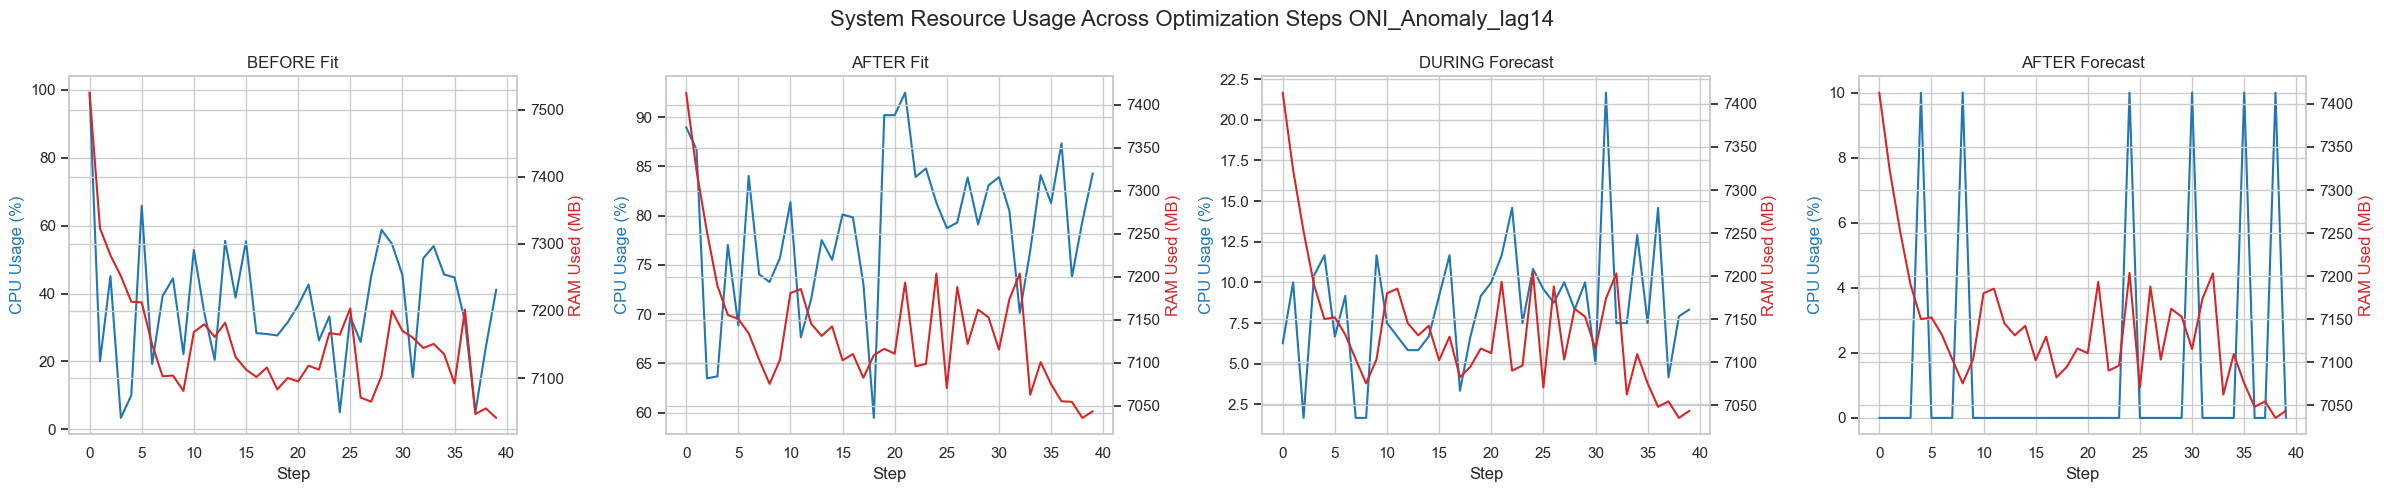

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=False)
cpu_cols = [
    'cpu_before_fit', 'cpu_after_fit', 'cpu_during_forecast', 'cpu_after_forecast'
]
ram_cols = [
    'ram_before_fit_mb', 'ram_after_fit_mb', 'ram_after_forecast_mb', 'ram_after_forecast_mb'
]
titles = ["BEFORE Fit", "AFTER Fit", "DURING Forecast", "AFTER Forecast"]

for i, (cpu_col, ram_col, title) in enumerate(zip(cpu_cols, ram_cols, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.plot(progress_df['step'], progress_df[cpu_col].apply(np.mean), label='CPU %', color='tab:blue')
    ax2.plot(progress_df['step'], progress_df[ram_col], label='RAM MB', color='tab:red')

    ax1.set_xlabel("Step")
    ax1.set_ylabel("CPU Usage (%)", color='tab:blue')
    ax2.set_ylabel("RAM Used (MB)", color='tab:red')
    ax1.set_title(title)
    ax1.grid(True)

plt.suptitle(f'System Resource Usage Across Optimization Steps {exo}', fontsize=16)
plt.tight_layout()
plt.show()

Best Parameters: {'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 2, 'a1': 1, 'a0': 1}


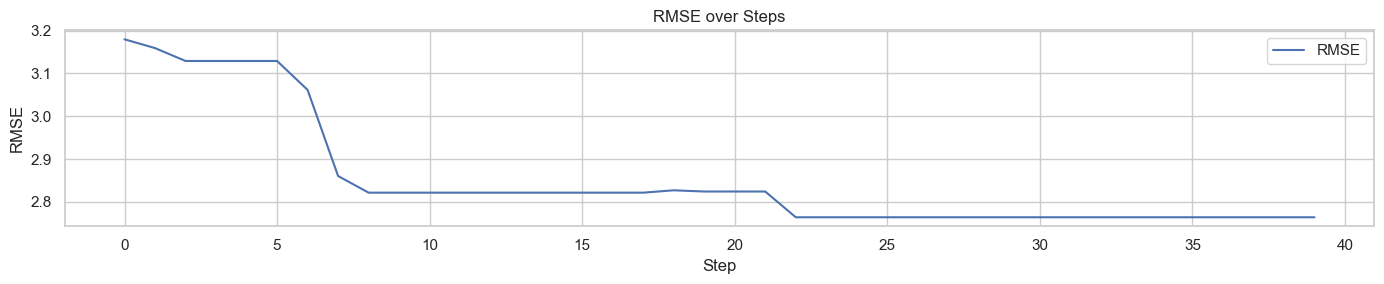

In [26]:
print("Best Parameters:", best_params)

fig, ax = plt.subplots(figsize=(14, 3))
ax.plot(progress_df['step'], progress_df['rmse'], label='RMSE')
ax.set_title('RMSE over Steps')
ax.set_xlabel("Step")
ax.set_ylabel("RMSE")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [27]:
progress_df

,step,rmse,mse,r2,params,cpu_before_fit,cpu_after_fit,cpu_after_forecast,cpu_during_forecast,ram_before_fit_mb,ram_after_fit_mb,ram_after_forecast_mb
0,0,3.179600,10.109858,-0.007748,"{'p': 1, 'd': 0, 'q': 1, 'P': 1, 'D': 1, 'Q': ...","[99.0, 99.0, 99.0, 100.0, 99.0, 99.0, 99.0, 99...","[66.0, 64.9, 96.7, 95.4, 96.7, 92.7, 94.7, 94....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7525.515625,7413.968750,7412.968750
1,1,3.159125,9.980071,0.005189,"{'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': ...","[0.0, 0.0, 100.0, 50.0, 0.0, 50.0, 0.0, 0.0, 0...","[35.1, 37.2, 100.0, 98.7, 100.0, 100.0, 100.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 16.666666666666668, 8.3333333333333...",7323.218750,7323.218750,7323.218750
2,2,3.129023,9.790785,0.024057,"{'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': ...","[27.3, 27.3, 80.1, 74.1, 62.7, 62.4, 44.2, 30....","[27.1, 26.0, 86.9, 85.8, 85.2, 82.5, 70.7, 66....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 8.333333333333334, 8.3333...",7283.171875,7252.140625,7252.140625
3,3,3.129023,9.790785,0.024057,"{'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': ...","[0.0, 33.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[27.0, 27.1, 91.5, 89.9, 89.9, 81.5, 65.0, 55....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 20.833333333333332, 8.3333333333333...",7252.140625,7189.578125,7190.156250
4,4,3.129023,9.790785,0.024057,"{'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': ...","[0.0, 0.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[27.9, 26.8, 95.1, 95.1, 94.0, 91.8, 83.6, 87....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 16.666666666666668, 16.666666666666...",7213.781250,7155.781250,7150.250000
5,5,3.129023,9.790785,0.024057,"{'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': ...","[28.6, 27.6, 87.1, 85.9, 81.5, 76.8, 72.5, 72....","[38.7, 37.6, 88.0, 87.9, 82.5, 84.2, 74.9, 68....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 16.666666666666668, 16.666666666666...",7212.781250,7151.140625,7152.171875
6,6,3.061628,9.373568,0.065645,"{'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': ...","[18.8, 18.7, 42.6, 30.6, 39.6, 16.7, 18.8, 4.3...","[27.5, 29.4, 98.3, 99.2, 98.3, 99.2, 96.7, 97....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 16.6666666666666...",7149.906250,7134.437500,7132.218750
7,7,2.860523,8.182592,0.184361,"{'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': ...","[18.9, 18.0, 59.7, 65.6, 53.9, 55.1, 38.0, 33....","[22.1, 19.7, 92.0, 94.1, 87.6, 90.6, 86.0, 83....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.333333333333334, 0.0, 0.0, 0.0, 0.0, 8.3333...",7102.703125,7103.703125,7103.703125
8,8,2.821682,7.961890,0.206361,"{'p': 1, 'd': 1, 'q': 1, 'P': 0, 'D': 0, 'Q': ...","[22.5, 17.5, 65.0, 73.2, 50.0, 65.0, 45.0, 36....","[23.4, 22.1, 94.0, 91.0, 89.9, 88.0, 87.4, 86....","[0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7103.703125,7075.656250,7075.656250
9,9,2.821682,7.961890,0.206361,"{'p': 1, 'd': 1, 'q': 1, 'P': 0, 'D': 0, 'Q': ...","[19.7, 18.0, 49.4, 32.1, 35.5, 41.9, 19.0, 3.7...","[47.5, 47.0, 88.2, 89.2, 85.4, 83.8, 83.8, 82....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 8.333333333333334, 16.666666666666668, 1...",7080.781250,7103.625000,7103.625000


In [1]:
xbest = best_params
print("Best Parameters Found:")
print(xbest)

model = SARIMAX(
    endog=df_train['log_diff_claimsPerCapita'],
    exog=df_train[f'{exo}'],
    order=(xbest['p'], xbest['d'], xbest['q']),
    trend=[xbest['a0'], xbest['a1']],
    seasonal_order=(xbest['P'], xbest['D'], xbest['Q'], 12)
).fit()

forecast = model.forecast(steps=df_test.shape[0], exog=df_test[f'{exo}'])
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
plt.plot(df_train['Date'], df_train['log_diff_claimsPerCapita'], label='Historical Claims Per Capita', color='tab:blue')
plt.plot(df_test['Date'], df_test['log_diff_claimsPerCapita'], label='Future Claims Per Capita - Actual', color='tab:grey')
plt.plot(df_test['Date'], forecast, label='Future Claims Per Capita - Forecast', color='tab:red')
plt.xlabel('Date')
plt.ylabel('log_diff_claimsPerCapita')
plt.title(f'Log Differential Claims Per Capita Forecast - {exo}')
plt.legend()
plt.show()


NameError: name 'best_params' is not defined

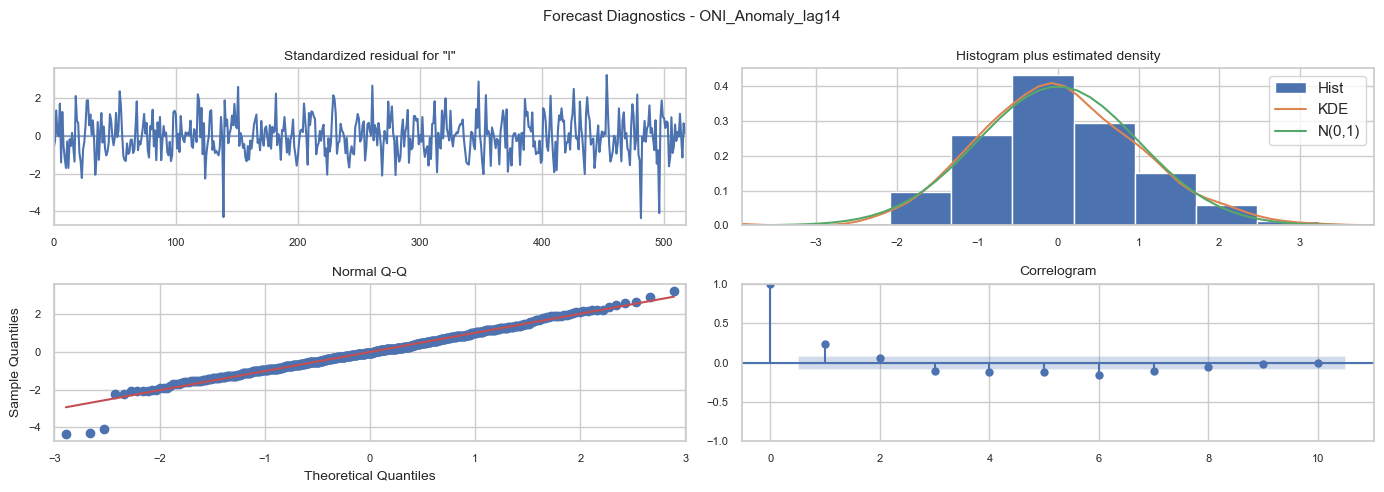

In [29]:
fig = model.plot_diagnostics(figsize=(14, 5))
for ax in fig.axes:
    ax.title.set_fontsize(10)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.tick_params(axis='both', labelsize=8)

fig.suptitle(f'Forecast Diagnostics - {exo}', fontsize=11)
plt.tight_layout()
plt.show()